In [417]:

from splinter import Browser
from bs4 import BeautifulSoup
import requests
import math
import dateutil
import datetime as dt
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier 
import scipy as sc 
import seaborn as sns 
import joblib
from sklearn.preprocessing import StandardScaler
from joblib import dump, load



# from webdriver_manager.chrome import ChromeDriverManager

## Creating Soup

In [2]:
# from webdriver_manager.chrome import ChromeDriverManager
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)
nyc_soup = BeautifulSoup(requests.get("https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page").text, "html.parser")

## Finding and Fetching urls 

In [3]:
url_list = []

for tr in list(nyc_soup.find_all("tr"))[23:]: 
    try:
        url_list.append(f"https://www1.nyc.gov{tr.find_all('a')[1]['href']}")
    except:
        pass

url_list







['https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_manhattan.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_bronx.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_brooklyn.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_queens.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_staten_island.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_manhattan.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_bronx.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_brooklyn.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_queens.xlsx',
 'https://www1.nyc.gov

## Readinng in each df and adding to a list. 

In [4]:
list_df = []
for url in url_list:
    try:
        list_df.append(pd.read_excel(url))
    except:
        print(url)


list_df[10]


,"MANHATTAN ANNUALIZE SALE FOR 2018. (All Sales From January 1, 2018 - December 31, 2018)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 4/11/2019. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name and Descriptive Data is as o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1,0,1,987,2183,1860,1,A4,0,2018-05-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17040,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1010,NaN,RK,4260 BROADWAY,COM10,...,0,1,1,0,1218,0,4,RK,0,2018-08-03 00:00:00
17041,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1011,NaN,RK,4260 BROADWAY,COM11,...,0,1,1,0,522,0,4,RK,0,2018-08-03 00:00:00
17042,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1012,NaN,RK,4260 BROADWAY,COM12,...,0,1,1,0,1025,0,4,RK,0,2018-08-03 00:00:00
17043,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1013,NaN,RK,4260 BROADWAY,COM13,...,0,1,1,0,1061,0,4,RK,0,2018-08-03 00:00:00


## Getting rid of un needed rows

In [5]:
list_df_2020_2018 = list_df[0:10]
list_df_2020_2018[0][7:]

,MANHATTAN ANNUAL SALES FOR CALENDAR YEAR 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
7,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,72,NaN,B9,231 EAST 7TH,NaN,...,2,0,2,1718,5154,1901,1,B9,0,2020-10-02 00:00:00
8,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,0,2020-10-31 00:00:00
9,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,4350000,2020-07-16 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,10,NaN,C7,274 EAST 3RD,NaN,...,9,1,10,2021,6445,1900,2,C7,0,2020-12-27 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8,2,10,1501,6929,1900,2,C7,3672530,2020-11-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,1,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,4,2180,35,NaN,W3,554 FT WASHINGTON AVENUE,NaN,...,0,2,2,19300,14040,1930,4,W3,12000000,2020-10-22 00:00:00
12883,1,WASHINGTON HEIGHTS UPPER,37 RELIGIOUS FACILITIES,4,2170,118,NaN,M1,37-41 HILLSIDE AVENUE,NaN,...,0,1,1,20375,5200,1959,4,M1,8000000,2020-08-20 00:00:00
12884,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,NaN,RB,"40 PINEHURST AVENUE, CFA",CFA,...,0,1,1,0,0,2016,4,RB,0,2020-04-29 00:00:00
12885,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1102,NaN,RB,"40 PINEHURST AVENUE, CFB",CFB,...,0,1,1,0,0,2016,4,RB,0,2020-04-29 00:00:00


## adding in column names and creating complete merged data named massive_df 

In [349]:


list_df_b4_2018 = list_df[11:][4:]




df_list = []

for current in list_df_b4_2018:
    header = current.iloc[3]
    new_df = current[4:]
    new_df.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
    df_list.append(new_df)

df_list_20_19 = []
for i in list_df_2020_2018:
    header = i.iloc[6]
    new_df_20_19 = i[7:]
    new_df_20_19.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
    df_list_20_19.append(new_df_20_19)


big_df = df_list_20_19 + df_list
no_outlier = []




massive_df = pd.concat(big_df)
massive_df


,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
7,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,72,NaN,B9,231 EAST 7TH,NaN,...,2,0,2,1718,5154,1901,1,B9,0,2020-10-02 00:00:00
8,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,0,2020-10-31 00:00:00
9,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,4350000,2020-07-16 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,10,NaN,C7,274 EAST 3RD,NaN,...,9,1,10,2021,6445,1900,2,C7,0,2020-12-27 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8,2,10,1501,6929,1900,2,C7,3672530,2020-11-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7105,157,,V0,TURNER STREET,,...,0,0,0,18269,0,0,1,V0,498000,2003-06-25 00:00:00
12670,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7105,163,,V0,TURNER STREET,,...,0,0,0,69089,0,0,1,V0,602000,2003-06-25 00:00:00
12671,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,129,,G0,CLAY PIT ROAD,,...,0,0,0,7920,0,0,1,V0,127000,2003-03-28 00:00:00
12672,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7346,25,,A3,306 BLOOMINGDALE ROAD,,...,1,0,1,13176,7902,2005,1,V0,0,2003-08-29 00:00:00


## Data CLeaning. Getting rid of Zeros then taking log of certian varible

In [341]:
massive_df

,ln_SALE_PRICE,ln_GROSS_SQUARE_FEET,ln_LAND_SQUARE_FEET,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,YEAR_BUILT,ZIP_CODE,YEAR,BOROUGH
11,15.116391,8.843471,7.313887,8.0,2.0,1900.0,10009,2020,1
32,14.038654,8.708640,7.369601,8.0,1.0,1900.0,10009,2020,1
33,14.038654,8.699515,7.368970,8.0,1.0,1900.0,10009,2020,1
34,10.523768,8.920656,7.560080,8.0,2.0,1920.0,10009,2020,1
35,9.936003,8.920656,7.560080,8.0,2.0,1920.0,10009,2020,1
...,...,...,...,...,...,...,...,...,...
11701,12.326075,7.438384,8.853665,2.0,1.0,1931.0,10310,2003,5
11728,13.399995,8.582419,8.507143,3.0,3.0,1930.0,10310,2003,5
11732,9.798127,7.803843,7.244228,1.0,2.0,1930.0,10310,2003,5
11836,12.283034,7.824046,8.124151,1.0,1.0,1931.0,10310,2003,5


In [381]:

massive_df['YEAR'] = pd.DatetimeIndex(massive_df['SALE_DATE']).year

massive_df= massive_df[massive_df['SALE_PRICE'] > 100]
massive_df= massive_df[massive_df['SALE_PRICE'] < 10000000 ]
massive_df= massive_df[massive_df['GROSS_SQUARE_FEET'] > 10]
massive_df= massive_df[massive_df['GROSS_SQUARE_FEET'] < 200000]
massive_df= massive_df[massive_df['LAND_SQUARE_FEET'] > 5]
massive_df= massive_df[massive_df['LAND_SQUARE_FEET'] < 100000]

massive_df = massive_df[massive_df['COMMERCIAL_UNITS'] != 0]
massive_df = massive_df[massive_df['RESIDENTIAL_UNITS'] != 0]
massive_df = massive_df[massive_df['YEAR_BUILT'] != 0]
massive_df = massive_df[massive_df['COMMERCIAL_UNITS'] < 40]
massive_df = massive_df[massive_df['RESIDENTIAL_UNITS'] < 500]
massive_df = massive_df[massive_df['YEAR_BUILT'] > 1875]


massive_df['SALE_PRICE'] = massive_df['SALE_PRICE'].astype(float)
massive_df['GROSS_SQUARE_FEET'] = massive_df['GROSS_SQUARE_FEET'].astype(float)
massive_df['LAND_SQUARE_FEET'] = massive_df['LAND_SQUARE_FEET'].astype(float)
massive_df['COMMERCIAL_UNITS'] = massive_df['COMMERCIAL_UNITS'].astype(float)
massive_df['RESIDENTIAL_UNITS'] = massive_df['RESIDENTIAL_UNITS'].astype(float)
massive_df['YEAR_BUILT'] = massive_df['YEAR_BUILT'].astype(float)



massive_df['ln_SALE_PRICE'] = np.log(massive_df['SALE_PRICE'])
massive_df['ln_GROSS_SQUARE_FEET'] = np.log(massive_df['GROSS_SQUARE_FEET'])
massive_df['ln_LAND_SQUARE_FEET'] = np.log(massive_df['LAND_SQUARE_FEET'])

massive_df['ln_SALE_PRICE'] = np.nan_to_num(massive_df['ln_SALE_PRICE'])
massive_df['ln_GROSS_SQUARE_FEET'] = np.nan_to_num(massive_df['ln_GROSS_SQUARE_FEET'])
massive_df['ln_LAND_SQUARE_FEET'] = np.nan_to_num(massive_df['ln_LAND_SQUARE_FEET'])

massive_df['YEAR_BUILT'].min()

ln_df = massive_df[['ln_SALE_PRICE', 'ln_GROSS_SQUARE_FEET', 'ln_LAND_SQUARE_FEET','RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS','YEAR_BUILT','ZIP_CODE', 'YEAR', 'BOROUGH']]



# massive_df = massive_df[~np.all(massive_df == 0, axis=1)]


## Getting rid of zeros in df due to result of log transform. Elimating outliers in Gross Square Feet

In [382]:
ln_df= ln_df[ln_df['ln_SALE_PRICE'] != 0]
ln_df= ln_df[ln_df['ln_GROSS_SQUARE_FEET'] != 0]
ln_df= ln_df[ln_df['ln_GROSS_SQUARE_FEET'] > 4]
ln_df= ln_df[ln_df['ln_LAND_SQUARE_FEET'] != 0]


ln_df['ln_SALE_PRICE'] = ln_df['ln_SALE_PRICE'].astype(float)
ln_df['ln_GROSS_SQUARE_FEET'] = ln_df['ln_GROSS_SQUARE_FEET'].astype(float)
ln_df['ln_LAND_SQUARE_FEET'] = ln_df['ln_LAND_SQUARE_FEET'].astype(float)
ln_df['COMMERCIAL_UNITS'] = ln_df['COMMERCIAL_UNITS'].astype(float)
ln_df['RESIDENTIAL_UNITS'] = ln_df['RESIDENTIAL_UNITS'].astype(float)
ln_df['YEAR_BUILT'] = ln_df['YEAR_BUILT'].astype(float)
ln_df['ZIP_CODE'] = ln_df['ZIP_CODE'].astype(int)



# Scatter Plot for ln_gross_sqft and ln_land_sqft vs ln_sale_price

No handles with labels found to put in legend.


coef for Gross Square Feet is : 0.2811066294891178


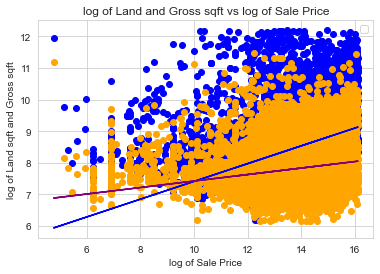

coef for Land Square Feet is : 0.10277626244984046


In [383]:
x = ln_df['ln_SALE_PRICE']
y = ln_df['ln_GROSS_SQUARE_FEET']
z = ln_df['ln_LAND_SQUARE_FEET']


plt.scatter(x, y, color= 'blue')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color= 'blue')
print(f'coef for Gross Square Feet is : {m}')
plt.scatter(x, z, color= 'orange')
m2, b2 = np.polyfit(x, z, 1)
plt.plot(x, m2*x+b2, color= 'purple')
plt.title('log of Land and Gross sqft vs log of Sale Price')
plt.xlabel('log of Sale Price')
plt.ylabel('log of Land sqft and Gross sqft')
plt.legend()
plt.show()
print(f'coef for Land Square Feet is : {m2}')


## 3D rotating scatter plot for ln_Sale_Price, ln_Gross_Square_Feet and ln_Land_Square_Feet

In [237]:
%matplotlib qt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
 


def threeD_rotation():
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(projection ="3d")
    ax.scatter3D(x, y, z, color = "green")
    ax.set_xlabel('ln_Sale_Price')
    ax.set_ylabel('ln_Gross_Square_Feet')
    ax.set_zlabel('ln_Land_Square_Feet')
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(.001)
        plt.show()

threeD_rotation()


## Scatter plot for Commercial units vs log Sale Price


coef for COMMERCIAL_UNITS is : 0.2375450699391175


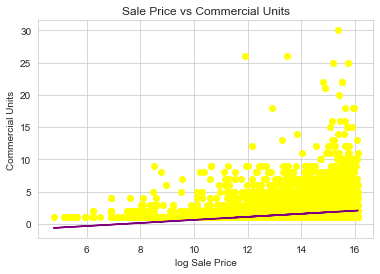

In [384]:
Y = ln_df['COMMERCIAL_UNITS'] 
Y2 = ln_df['RESIDENTIAL_UNITS']

plt.scatter(x, Y, color= 'yellow')
m, b = np.polyfit(x, Y, 1)
plt.plot(x, m*x+b, color= 'purple')
plt.xlabel('log Sale Price')
plt.ylabel('Commercial Units')
plt.title('Sale Price vs Commercial Units')
print(f'coef for COMMERCIAL_UNITS is : {m}')
plt.show()



## Scatter plot for Residential units vs log Sale Price

coef for Residiential Units is: 2.9377814242995153


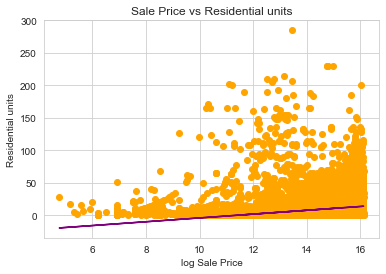

In [385]:
plt.scatter(x, Y2, color= 'orange')
m2, b2 = np.polyfit(x, Y2, 1)
plt.plot(x, m2*x+b2, color= 'purple')
plt.xlabel('log Sale Price')
plt.ylabel('Residential units')
plt.title('Sale Price vs Residential units')
print(f'coef for Residiential Units is: {m2}')
plt.show()

## Scatter Plot for Year Built vs log Sale Price

coef for Year Built is : -1.3456104599156178


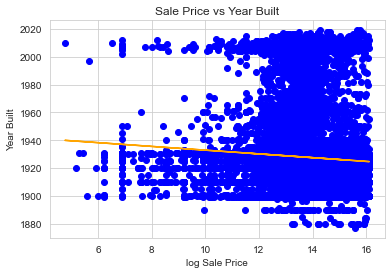

In [386]:
Y = ln_df['YEAR_BUILT']

plt.scatter(x, Y, color= 'blue')
m, b = np.polyfit(x, Y, 1)
plt.plot(x, m*x+b, color= 'orange')
plt.xlabel('log Sale Price')
plt.ylabel('Year Built')
plt.title('Sale Price vs Year Built')
print(f'coef for Year Built is : {m}')
plt.show()

## Creating a Data Frame without the Natural Log

In [387]:
non_ln_df = massive_df[['BOROUGH', 'TAX_CLASS_AT_PRESENT', 'LOT', 'ZIP_CODE', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE', 'YEAR']]
non_ln_df

,BOROUGH,TAX_CLASS_AT_PRESENT,LOT,ZIP_CODE,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,YEAR
11,1,2B,1,10009,10,1501.0,6929.0,1900.0,2,3672530.0,2020-11-24 00:00:00,2020
32,1,2B,6,10009,9,1587.0,6055.0,1900.0,2,1250000.0,2020-06-16 00:00:00,2020
33,1,2B,7,10009,9,1586.0,6000.0,1900.0,2,1250000.0,2020-06-16 00:00:00,2020
34,1,2B,37,10009,10,1920.0,7485.0,1920.0,2,37189.0,2020-09-01 00:00:00,2020
35,1,2B,37,10009,10,1920.0,7485.0,1920.0,2,20661.0,2020-09-01 00:00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,5,1,5,10310,3,7000.0,1700.0,1931.0,1,225500.0,2003-07-22 00:00:00,2003
11728,5,2A,62,10310,6,4950.0,5337.0,1930.0,1,660000.0,2003-12-30 00:00:00,2003
11732,5,1,1,10310,3,1400.0,2450.0,1930.0,1,18000.0,2003-02-03 00:00:00,2003
11836,5,4,75,10310,2,3375.0,2500.0,1931.0,4,216000.0,2003-11-11 00:00:00,2003


In [379]:
non_ln_df['GROSS_SQUARE_FEET'].max()

197904.0

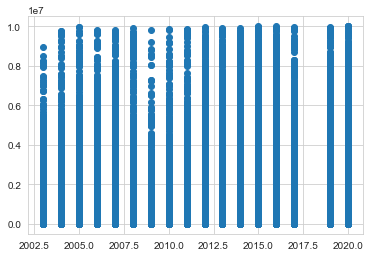

In [294]:
plt.scatter(non_ln_df['YEAR'], non_ln_df['SALE_PRICE'])

## Histograms for Sale Price, Gross Square Feet and Land Square Feet

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


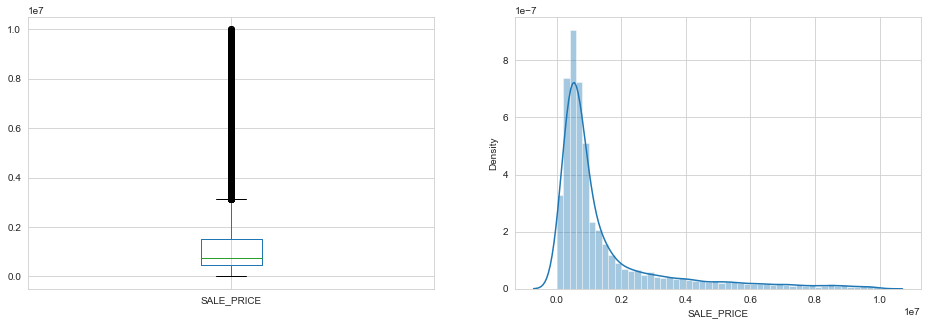

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


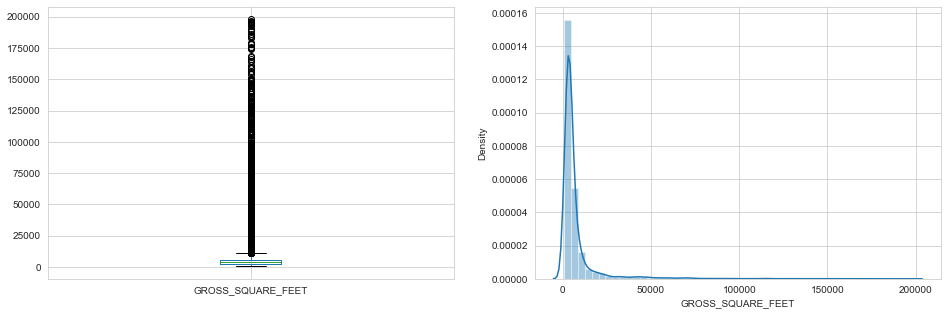

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


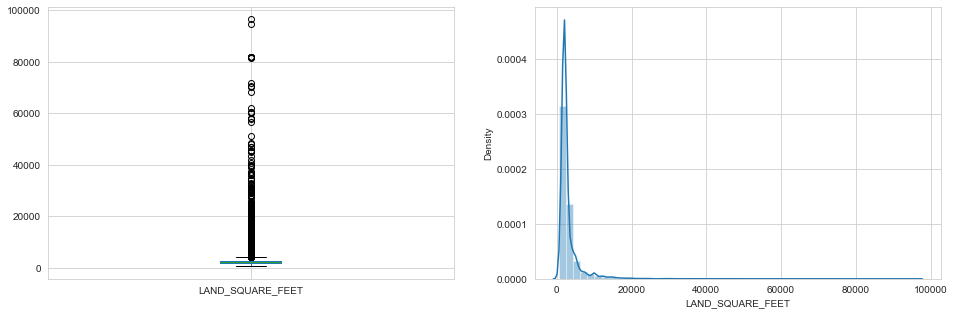

In [388]:
plt.subplot(121), non_ln_df['SALE_PRICE'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(non_ln_df['SALE_PRICE'])
plt.show()

plt.subplot(121), non_ln_df['GROSS_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(non_ln_df['GROSS_SQUARE_FEET'])
plt.show()

plt.subplot(121), non_ln_df['LAND_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(non_ln_df['LAND_SQUARE_FEET'])
plt.show()

## Histograms For ln_Sale_Price, ln_Gross_Square_Feet, ln_Land_Square_Feet

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


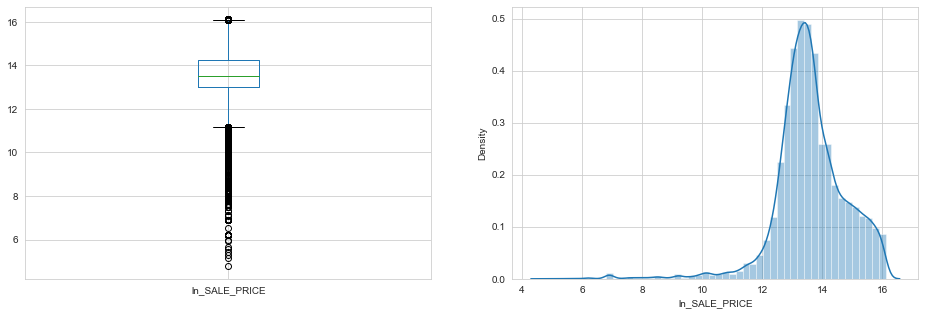

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


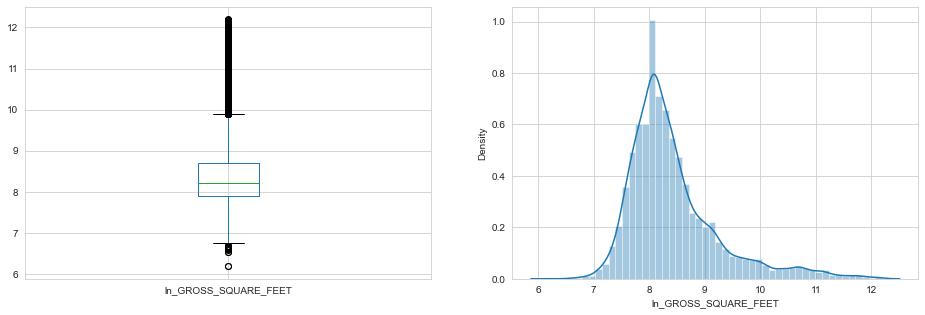

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


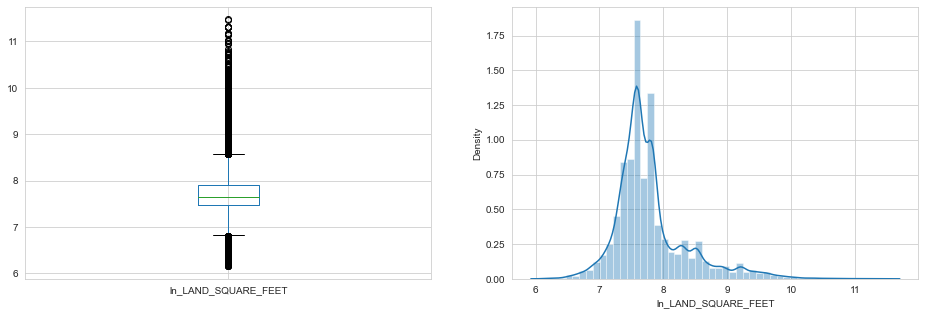

In [389]:
%matplotlib inline
sns.set_style('whitegrid')

plt.subplot(121), ln_df['ln_SALE_PRICE'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_df['ln_SALE_PRICE'])
plt.show()

plt.subplot(121), ln_df['ln_GROSS_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_df['ln_GROSS_SQUARE_FEET'])
plt.show()

plt.subplot(121), ln_df['ln_LAND_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_df['ln_LAND_SQUARE_FEET'])
plt.show()



## Correlation Heat Maps for non_ln_df and ln_df

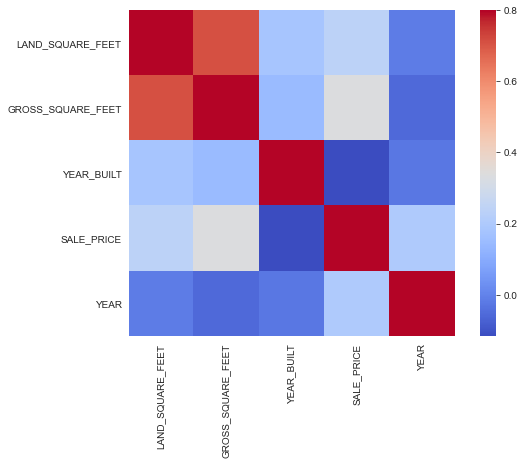

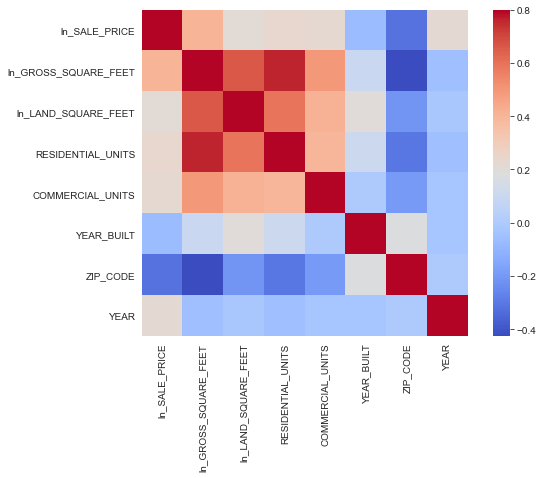

In [390]:
matrix_non_ln = non_ln_df.corr()
ax =plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_non_ln, vmax=.8, square=True, cmap='coolwarm')

matrix_ln = ln_df.corr()
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_ln, vmax=.8, square=True, cmap='coolwarm')



## Creating Year dummy varibles and adding it to existing df and dropping Zip Code

In [391]:
## BY Borough ##
year_dummies = pd.get_dummies(ln_df['YEAR'])
# zip_dummies = pd.get_dummies(ln_df['ZIP_CODE'])
ln_year_dum_df = pd.concat([ln_df, year_dummies], axis=1)

ln_year_dum_df = ln_year_dum_df.drop(columns='ZIP_CODE')
ln_year_dum_df
# matrix_ln = ln_zip_dum_df.corr()
# ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_ln, vmax=.8, square=True, cmap='coolwarm')


,ln_SALE_PRICE,ln_GROSS_SQUARE_FEET,ln_LAND_SQUARE_FEET,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,YEAR_BUILT,YEAR,BOROUGH,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2019,2020
11,15.116391,8.843471,7.313887,8.0,2.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32,14.038654,8.708640,7.369601,8.0,1.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,0,1
33,14.038654,8.699515,7.368970,8.0,1.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,0,1
34,10.523768,8.920656,7.560080,8.0,2.0,1920.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,0,1
35,9.936003,8.920656,7.560080,8.0,2.0,1920.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11701,12.326075,7.438384,8.853665,2.0,1.0,1931.0,2003,5,1,0,...,0,0,0,0,0,0,0,0,0,0
11728,13.399995,8.582419,8.507143,3.0,3.0,1930.0,2003,5,1,0,...,0,0,0,0,0,0,0,0,0,0
11732,9.798127,7.803843,7.244228,1.0,2.0,1930.0,2003,5,1,0,...,0,0,0,0,0,0,0,0,0,0
11836,12.283034,7.824046,8.124151,1.0,1.0,1931.0,2003,5,1,0,...,0,0,0,0,0,0,0,0,0,0


## Creating Vif function that accounts for muliticolinearity. 
## If Vif = 1 no muliticolinearity 
## if 5 < Vif < 10 Then there is problamatic multicolenarity. 

In [392]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dropped_df = ln_year_dum_df.drop(columns= ['YEAR', 'YEAR_BUILT', 'BOROUGH'], axis=1)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(dropped_df)


,variables,VIF
0,ln_SALE_PRICE,1.346909
1,ln_GROSS_SQUARE_FEET,3.532943
2,ln_LAND_SQUARE_FEET,1.900791
3,RESIDENTIAL_UNITS,2.536619
4,COMMERCIAL_UNITS,1.353741
5,2003,41.241766
6,2004,44.317157
7,2005,42.753539
8,2006,36.757314
9,2007,33.646990


## Creating a split by burough function to split the data frame into 5 separate burrows. 

In [393]:
def split_BOROUGH(dt):
    # dt['BOROUGH'] = dt['BOROUGH']
    return [dt[dt['BOROUGH'] == y] for y in range(1, 6)]


split = split_BOROUGH(ln_year_dum_df)

range(len(split))


Manhattan_df = split[0]
Bronx_df = split[1]
Brooklyn_df = split[2]
Queens_df = split[3]
Staten_Island_df = split[4]

## ML Linear Regression for Manhatten 

In [394]:
X = Manhattan_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Manhattan_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
manhat_coef_array = linear_reg.coef_


0.0920330384711423
0.11979199568274246


## Creating Years varible to add to Coef Array's

In [395]:
years = [0, 0, 0, 0, 0, 2003, 2004, 2005, 2006, 2007, 2008,  2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020]
years = pd.DataFrame(years)

## Making manhat_coef_arry into pandas df cleaning it and plotting it. 

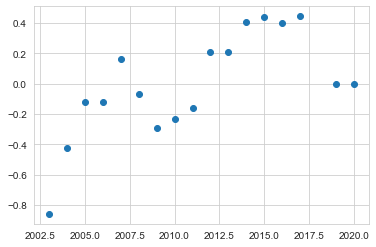

In [396]:
manhat_coef_df = pd.DataFrame(manhat_coef_array)
manhat_coef_df = pd.concat([manhat_coef_df, years], axis=1)
manhat_coef_df.columns = ['manhat_Coef', 'Year']
manhat_coef_df[5:]

plt.scatter(manhat_coef_df[5:]['Year'],manhat_coef_df[5:]['manhat_Coef'] )

## ML Linear Regression for Bronx

In [397]:
X = Bronx_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Bronx_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
bronx_coef_array = linear_reg.coef_

0.5229236665048509
0.43556446830261997


## Making bronx_coef_df into pandas df cleaning it and plotting it. 

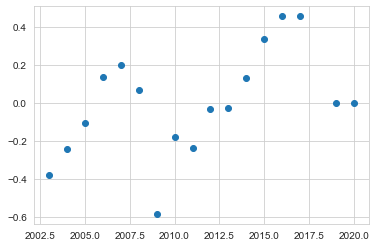

In [398]:
bronx_coef_df = pd.DataFrame(bronx_coef_array)
bronx_coef_df = pd.concat([bronx_coef_df, years], axis=1)
bronx_coef_df.columns = ['Bronx_Coef', 'Year']

plt.scatter(bronx_coef_df[5:]['Year'],bronx_coef_df[5:]['Bronx_Coef'] )

## ML Linear Regression for Brooklyn

In [399]:
X = Brooklyn_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Brooklyn_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
brook_coef_array = linear_reg.coef_

0.18471008404240374
0.22503466316788523


## Making brooklyn_coef_arry into pandas df cleaning it and plotting it. 

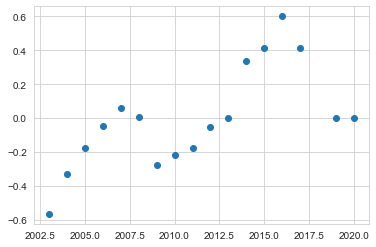

In [400]:
brooklyn_coef_df = pd.DataFrame(brook_coef_array)
brooklyn_coef_df = pd.concat([brooklyn_coef_df, years], axis=1)
brooklyn_coef_df.columns = ['Brooklyn_Coef', 'Year']

plt.scatter(brooklyn_coef_df[5:]['Year'],brooklyn_coef_df[5:]['Brooklyn_Coef'] )

## ML Linear Regression for Staten Island

In [401]:
X = Staten_Island_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Staten_Island_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
staten_coef_array = linear_reg.coef_

0.1614149493114907
0.23204202194949286


## Making staten_coef_array into pandas df cleaning it and plotting it. 

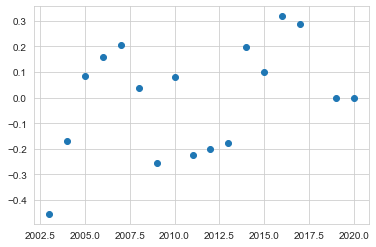

In [402]:
staten_coef_array = pd.DataFrame(staten_coef_array)
staten_coef_array = pd.concat([staten_coef_array, years], axis=1)
staten_coef_array.columns = ['Staten_Coef', 'Year']

plt.scatter(staten_coef_array[5:]['Year'],staten_coef_array[5:]['Staten_Coef'] )

## ML Linear Regression for Queens

In [403]:
X = Queens_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Queens_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
queens_coef_array = linear_reg.coef_

0.23907357463502732
0.19099620533249762


## Making queens_coef_array into pandas df cleaning it and plotting it. 

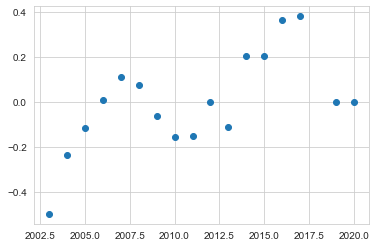

In [404]:
queens_coef_array = pd.DataFrame(queens_coef_array)
queens_coef_array = pd.concat([queens_coef_array, years], axis=1)
queens_coef_array.columns = ['Queens_Coef', 'Year']

plt.scatter(queens_coef_array[5:]['Year'],queens_coef_array[5:]['Queens_Coef'] )

## Creating two differently created line plots for nyc Housing Prices since 2003

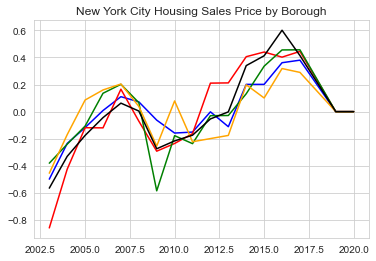

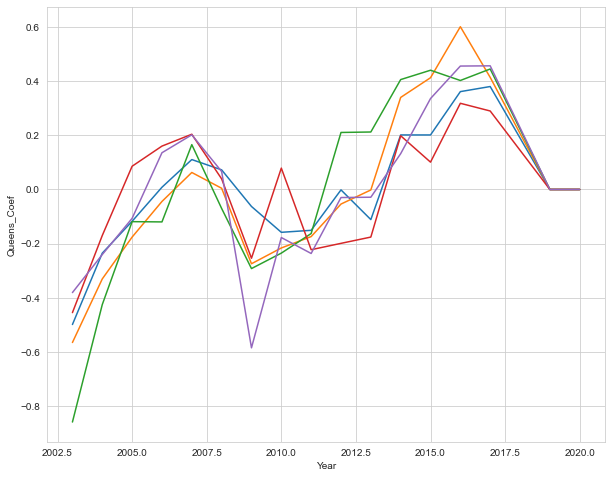

In [405]:

plt.plot(queens_coef_array[5:]['Year'],queens_coef_array[5:]['Queens_Coef'], color='blue' )
plt.plot(manhat_coef_df[5:]['Year'],manhat_coef_df[5:]['manhat_Coef'], color='red' )
plt.plot(bronx_coef_df[5:]['Year'],bronx_coef_df[5:]['Bronx_Coef'], color='green' )
plt.plot(staten_coef_array[5:]['Year'],staten_coef_array[5:]['Staten_Coef'], color='orange' )
plt.plot(brooklyn_coef_df[5:]['Year'],brooklyn_coef_df[5:]['Brooklyn_Coef'], color='black' )
plt.title('New York City Housing Sales Price by Borough')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
queens_plot =sns.lineplot(data=queens_coef_array[5:], x='Year', y='Queens_Coef')
brook_plot= sns.lineplot(data=brooklyn_coef_df[5:], x='Year', y='Brooklyn_Coef')
manhat_plot = sns.lineplot(data=manhat_coef_df[5:], x='Year', y='manhat_Coef')
staten_plot = sns.lineplot(data=staten_coef_array[5:], x='Year', y='Staten_Coef')
bronx_plot = sns.lineplot(data=bronx_coef_df[5:], x='Year', y='Bronx_Coef')




## Making NYC coef array Data Frame

In [406]:
nyc_coef_df = pd.concat([manhat_coef_df, staten_coef_array, brooklyn_coef_df, bronx_coef_df, queens_coef_array], axis=1)


In [407]:
nyc_coef_df = nyc_coef_df.drop(columns='Year')

In [408]:
nyc_coef_df = pd.concat([nyc_coef_df, years], axis=1)


In [409]:
nyc_coef_df = nyc_coef_df[5:]


In [410]:
nyc_coef_df = nyc_coef_df.rename(columns={0: 'Year'})


In [418]:
X = ln_year_dum_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = ln_year_dum_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.265     
Dependent Variable:   ln_SALE_PRICE    AIC:                78811.3520
Date:                 2021-11-30 23:00 BIC:                78992.1506
No. Observations:     27395            Log-Likelihood:     -39384.   
Df Model:             21               F-statistic:        471.6     
Df Residuals:         27373            Prob (F-statistic): 0.00      
R-squared:            0.266            Scale:              1.0389    
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.8169   0.0132  61.9455 0.0000  0.7910  0.8427
ln_LAND_SQUARE_FEET  -0.1543   0.0150 -10.2935 0.0000 -0.1837 -0.1249
RESIDENTIAL_UNITS    -0.0116   0.0007 -17.4005 0.0000 -0.0130 -0.0103
COMMERCIAL_UNITS      0.0420   0.0058  

In [411]:


X = Manhattan_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Manhattan_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.095     
Dependent Variable:  ln_SALE_PRICE    AIC:                12848.2209
Date:                2021-11-30 22:55 BIC:                12973.7386
No. Observations:    3928             Log-Likelihood:     -6404.1   
Df Model:            19               F-statistic:        22.69     
Df Residuals:        3908             Prob (F-statistic): 3.84e-75  
R-squared:           0.099            Scale:              1.5341    
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.2470   0.0607  4.0696 0.0000  0.1280  0.3660
ln_LAND_SQUARE_FEET  -0.0481   0.0731 -0.6583 0.5104 -0.1915  0.0952
RESIDENTIAL_UNITS    -0.0095   0.0013 -7.0713 0.0000 -0.0121 -0.0069
COMMERCIAL_UNITS      0.0316   0.0133  2.3785 0.0174 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [415]:
X = Queens_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Queens_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.226     
Dependent Variable:  ln_SALE_PRICE    AIC:                14788.2517
Date:                2021-11-30 22:58 BIC:                14923.8305
No. Observations:    6496             Log-Likelihood:     -7374.1   
Df Model:            19               F-statistic:        101.0     
Df Residuals:        6476             Prob (F-statistic): 0.00      
R-squared:           0.229            Scale:              0.56868   
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.5492   0.0245 22.4544 0.0000  0.5012  0.5971
ln_LAND_SQUARE_FEET   0.0545   0.0225  2.4232 0.0154  0.0104  0.0985
RESIDENTIAL_UNITS    -0.0156   0.0016 -9.9732 0.0000 -0.0187 -0.0125
COMMERCIAL_UNITS      0.0666   0.0105  6.3722 0.0000 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [414]:
X = Brooklyn_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Brooklyn_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.194     
Dependent Variable:  ln_SALE_PRICE    AIC:                31564.8280
Date:                2021-11-30 22:57 BIC:                31711.8822
No. Observations:    11530            Log-Likelihood:     -15762.   
Df Model:            19               F-statistic:        146.9     
Df Residuals:        11510            Prob (F-statistic): 0.00      
R-squared:           0.195            Scale:              0.90304   
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.4574   0.0246 18.5682 0.0000  0.4091  0.5057
ln_LAND_SQUARE_FEET   0.1382   0.0281  4.9184 0.0000  0.0832  0.1933
RESIDENTIAL_UNITS    -0.0014   0.0015 -0.9146 0.3604 -0.0044  0.0016
COMMERCIAL_UNITS      0.0574   0.0105  5.4853 0.0000 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [413]:
X = Bronx_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Bronx_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.499    
Dependent Variable:   ln_SALE_PRICE    AIC:                6597.8298
Date:                 2021-11-30 22:57 BIC:                6714.1903
No. Observations:     2485             Log-Likelihood:     -3278.9  
Df Model:             19               F-statistic:        131.4    
Df Residuals:         2465             Prob (F-statistic): 0.00     
R-squared:            0.503            Scale:              0.82627  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.7222   0.0361 20.0206 0.0000  0.6515  0.7929
ln_LAND_SQUARE_FEET   0.2820   0.0462  6.1099 0.0000  0.1915  0.3725
RESIDENTIAL_UNITS    -0.0092   0.0017 -5.5169 0.0000 -0.0125 -0.0060
COMMERCIAL_UNITS      0.0371   0.0122  3.0312 0.0025 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [416]:
X = Staten_Island_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Staten_Island_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.162    
Dependent Variable:   ln_SALE_PRICE    AIC:                2679.0851
Date:                 2021-11-30 22:58 BIC:                2777.3001
No. Observations:     1003             Log-Likelihood:     -1319.5  
Df Model:             19               F-statistic:        11.22    
Df Residuals:         983              Prob (F-statistic): 4.05e-31 
R-squared:            0.178            Scale:              0.82982  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.2773   0.0731  3.7917 0.0002  0.1338  0.4208
ln_LAND_SQUARE_FEET   0.3705   0.0503  7.3659 0.0000  0.2718  0.4692
RESIDENTIAL_UNITS    -0.0293   0.0110 -2.6553 0.0081 -0.0509 -0.0076
COMMERCIAL_UNITS      0.0819   0.0449  1.8224 0.0687 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
X = df_2003.drop(columns= ['ln_SALE_PRICE', 'year'],axis=1)
y = df_2003['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=50)
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
model.perdict(y_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
# y = df_2020['ln_SALE_PRICE']
# X = df_2020.drop(columns= 'ln_SALE_PRICE', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

In [ ]:

# X_test = df_2020.drop(columns= 'ln_SALE_PRICE', axis=1)
# y_test = df_2020['ln_SALE_PRICE']
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)
# prediction = linear_reg.predict(X_test)
# print(f'Training Score: {linear_reg.score(X_train, y_train)}')
# print(f'Testing Score: {linear_reg.score(X_test, y_test)}')


## Linear Regression 


In [ ]:
# for df in enumerate(split):
#     y = df['ln_SALE_PRICE']
#     X = df.drop(columns= 'ln_SALE_PRICE', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

#     linear_reg = LinearRegression()
#     linear_reg.fit(X_train, y_train)
#     prediction = linear_reg.predict(X_test)
#     coef_arry = linear_reg.coef_()
#     print(f'Training Score: {linear_reg.score(X_train, y_train)}')
#     print(f'Testing Score: {linear_reg.score(X_test, y_test)}')

# # y[0]
# # coef_arry

In [ ]:
print(range(len(split)))

range(0, 17)


In [ ]:
     
# if split[range(len(split))] == split[0]:
#     print('this is df 0')
# else:
#     print('not df 0')


        

In [ ]:
# print(f'Coef: \n {(linear_reg.coef_)}')
# print(f'Mean squared error or accuracury score is: {mean_squared_error(y_test, prediction)}')
# print(f'The R^2 is: {r2_score(y_test, prediction)}')

# coef_arry = linear_reg.coef_

# # plt.plot(X_test, prediction, color='black')

In [ ]:
# coef_arry = pd.DataFrame(coef_arry)

# plt.subplot(122), sns.distplot(coef_arry)
# plt.show()



# plt.scatter(coef_arry)

## RESIDUAL PLOT 


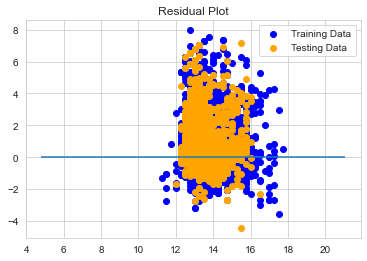

In [ ]:
plt.scatter(linear_reg.predict(X_train), linear_reg.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linear_reg.predict(X_test), linear_reg.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

## Logstic Regression 
